In [2]:
import sqlite3

# Database connect (agar file nahi hai to ye automatically create ho jayegi)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Table create karna
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

conn.commit()
print("Database and table created successfully!")

Database and table created successfully!


In [3]:
# Sample data insert karna

cursor.executemany("""
INSERT INTO sales (product, quantity, price)
VALUES (?, ?, ?)
""", [
    ("Product A", 5, 100),
    ("Product B", 3, 200),
    ("Product A", 2, 100),
    ("Product C", 4, 150),
    ("Product B", 1, 200)
])

conn.commit()
print("Data inserted successfully!")

Data inserted successfully!


In [4]:
cursor.execute("PRAGMA table_info(sales)")
print(cursor.fetchall())

[(0, 'product', 'TEXT', 0, None, 0), (1, 'quantity', 'INTEGER', 0, None, 0), (2, 'price', 'REAL', 0, None, 0)]


In [5]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [8]:
import pandas as pd

df = pd.read_sql_query(query, conn)
print(df)

     product  total_qty  revenue
0  Product A          7    700.0
1  Product B          4    800.0
2  Product C          4    600.0


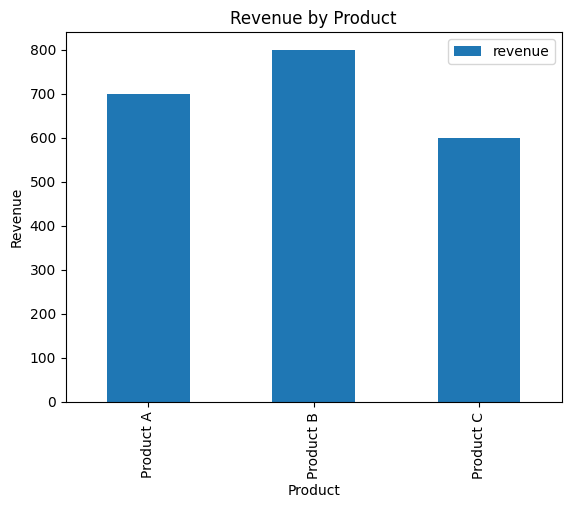

In [9]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue')

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")

plt.show()

In [10]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>